In [70]:
import numpy as np
import pandas as pd

CIFAR10 Dataset 생성

In [71]:
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [72]:
print("train dataset shape: ", train_images.shape, train_labels.shape)
print("test dataset shape: ", test_images.shape, test_labels.shape)


train dataset shape:  (50000, 32, 32, 3) (50000, 1)
test dataset shape:  (10000, 32, 32, 3) (10000, 1)


In [73]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [74]:
NAMES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
print(train_labels[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


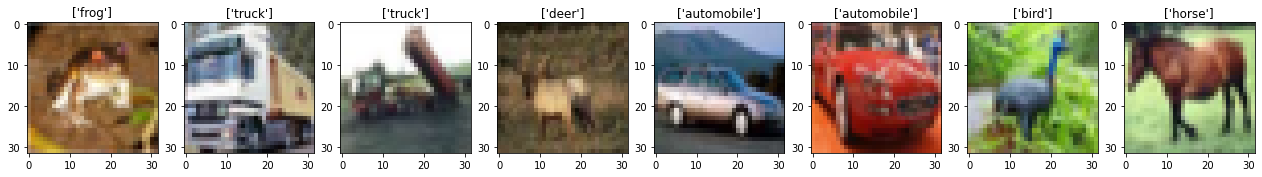

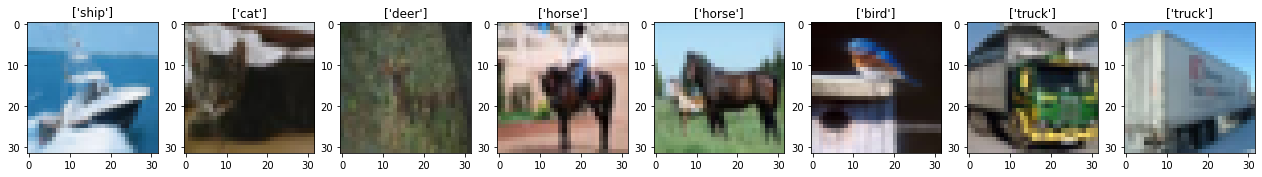

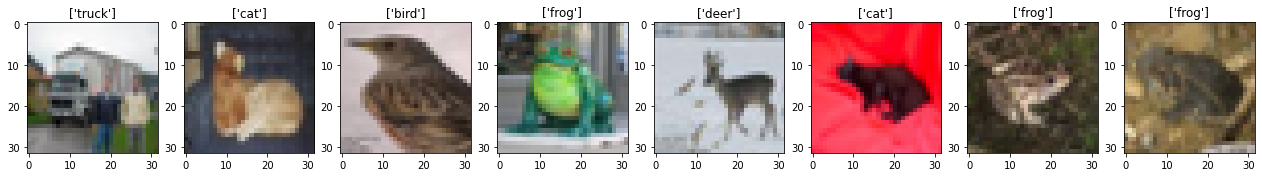

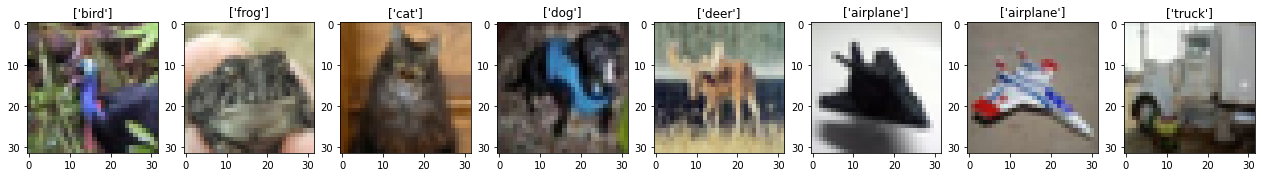

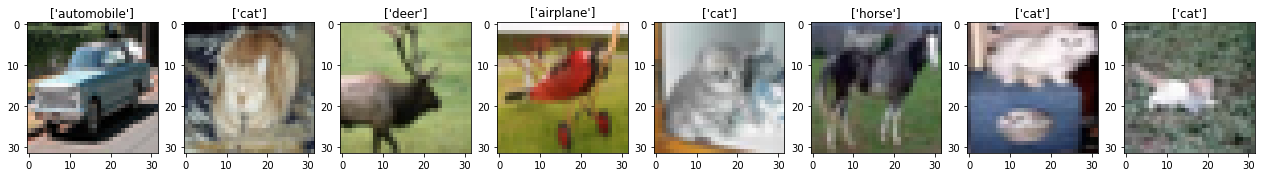

In [75]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i])
        label = labels[i].squeeze()
        axs[i].set_title(NAMES[labels[i]])
    
    
for x in range(5):
    show_images(train_images[x*8:x*8+8], train_labels[x*8:x*8+8], ncols=8)

In [76]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype = np.float32)
    labels = np.array(labels, dtype = np.float32)
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape: ",train_images.shape, train_labels.shape)
print("test dataset shape: ",test_images.shape, test_labels.shape)

train_images[0]

train dataset shape:  (50000, 32, 32, 3) (50000, 1)
test dataset shape:  (10000, 32, 32, 3) (10000, 1)


array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [77]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()

### Custom Model

In [78]:
IMAGE_SIZE = 32

In [79]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, Activation, MaxPool2D
from tensorflow.keras.optimizers import Adam, RMSprop

In [80]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# x = Conv2D(filters=32, kernel_size=(5,5), padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=(3,3), padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=(2,2))(x)

x = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=(3,3), padding='same')(x)
x = Activation('relu')(x)
x=MaxPool2D(pool_size=2)(x)

x = Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu')(x)
x = Conv2D(filters=128, kernel_size=(3,3), padding='same',activation='relu')(x)
x=MaxPool2D(pool_size=2)(x)

In [81]:
x = Flatten(name ='flatten')(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu', name = 'fc1')(x)
x = Dropout(rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs = input_tensor, outputs = output)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0   

In [82]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(x=train_images, y=train_labels, batch_size=64, epochs=30, validation_split=0.15 )

Epoch 1/30
665/665 [==============================] - 24s 36ms/step - loss: 1.9552 - accuracy: 0.2751 - val_loss: 4.3716 - val_accuracy: 0.1280
Epoch 2/30
665/665 [==============================] - 24s 36ms/step - loss: 1.5157 - accuracy: 0.4646 - val_loss: 4.8773 - val_accuracy: 0.1220
Epoch 3/30
665/665 [==============================] - 24s 36ms/step - loss: 1.5629 - accuracy: 0.4704 - val_loss: 7.4114 - val_accuracy: 0.1300
Epoch 4/30
665/665 [==============================] - 24s 36ms/step - loss: 1.5650 - accuracy: 0.4939 - val_loss: 9.8180 - val_accuracy: 0.1304
Epoch 5/30
665/665 [==============================] - 24s 37ms/step - loss: 1.8496 - accuracy: 0.4716 - val_loss: 13.0142 - val_accuracy: 0.1231
Epoch 6/30
665/665 [==============================] - 25s 37ms/step - loss: 2.8161 - accuracy: 0.2044 - val_loss: 2.3034 - val_accuracy: 0.1029
Epoch 7/30
665/665 [==============================] - 25s 38ms/step - loss: 2.3033 - accuracy: 0.1008 - val_loss: 2.3027 - val_accuracy

KeyboardInterrupt: 